In [3]:
import sys
!{sys.executable} -m pip install wbdata #Importo sys e instalo wbdata.

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [4]:
!pip install wbdata
import wbdata
import pandas as pd #Importo wbdata y padas como pd.

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
help(wbdata)

Help on package wbdata:

NAME
    wbdata - wbdata: A wrapper for the World Bank API

PACKAGE CONTENTS
    cache
    client
    dates
    fetcher

FUNCTIONS
    get_default_client() -> wbdata.client.Client
        Get the default client

VERSION
    1.0.0

FILE
    /home/069d7917-7ec0-4cad-ba72-09255942dcb2/.local/lib/python3.10/site-packages/wbdata/__init__.py




In [6]:
#Parte A - Ejercicio 1
wbdata.get_indicators(query="gdp per capita", source=2) #Busco los indicadores del banco mundial referidos al PBI per cápita

id                 name
-----------------  -------------------------------------------------------------------
NY.GDP.PCAP.CD     GDP per capita (current US$)
NY.GDP.PCAP.CN     GDP per capita (current LCU)
NY.GDP.PCAP.KD     GDP per capita (constant 2015 US$)
NY.GDP.PCAP.KD.ZG  GDP per capita growth (annual %)
NY.GDP.PCAP.KN     GDP per capita (constant LCU)
NY.GDP.PCAP.PP.CD  GDP per capita, PPP (current international $)
NY.GDP.PCAP.PP.KD  GDP per capita, PPP (constant 2021 international $)
SE.XPD.PRIM.PC.ZS  Government expenditure per student, primary (% of GDP per capita)
SE.XPD.SECO.PC.ZS  Government expenditure per student, secondary (% of GDP per capita)
SE.XPD.TERT.PC.ZS  Government expenditure per student, tertiary (% of GDP per capita)

In [7]:
indicadores = {'NY.GDP.PCAP.CD':'PBI per capita'}

PBI_per_capita = wbdata.get_dataframe(indicadores, country=['GBR','JPN']) #Con los indicadores del PBI, le pido que me muestre los de Reino Unido y de Japón 

pbi_pc = pd.DataFrame(PBI_per_capita)

pbi_pc.reset_index(inplace=True)
print(pbi_pc["date"].dtype) 
pbi_pc_2010 = pbi_pc[pbi_pc["date"]>"2009"] #Le solicito que mue muestre los datos de PBI de esos 2 paises desde 2010 en adelante
pbi_pc_2010

object


,country,date,PBI per capita
0,United Kingdom,2023,49463.855462
1,United Kingdom,2022,45935.927647
2,United Kingdom,2021,46896.866243
3,United Kingdom,2020,40201.681242
4,United Kingdom,2019,42662.535374
5,United Kingdom,2018,43203.814106
6,United Kingdom,2017,40572.121482
7,United Kingdom,2016,40985.235138
8,United Kingdom,2015,44964.391144
9,United Kingdom,2014,47439.616590


In [8]:
pbi_pc_2010 = pbi_pc_2010.set_index(["country", "date"]) #Lo organizo para que sea mas simple a la vista
pbi_pc_2010

PBI per capita
country        date                
United Kingdom 2023    49463.855462
               2022    45935.927647
               2021    46896.866243
               2020    40201.681242
               2019    42662.535374
               2018    43203.814106
               2017    40572.121482
               2016    40985.235138
               2015    44964.391144
               2014    47439.616590
               2013    43426.298141
               2012    42497.340497
               2011    42109.641880
               2010    39598.957120
Japan          2023    33766.526825
               2022    34017.271808
               2021    40058.537328
               2020    40040.765506
               2019    40415.956765
               2018    39751.133098
               2017    38834.052934
               2016    39375.473162
               2015    34960.639384
               2014    38475.395246
               2013    40898.647896
               2012    49145.280431
               2011    48760.078949
               2010    44968.156235

In [9]:
#Parte A - Ejercicio 2
estadisticas= pbi_pc_2010.groupby(by=["country"]).describe() #Para que me muestre el PBI mínimo, el máximo, los percentiles y promedio de cada país 
estadisticas

PBI per capita                                           \
                        count          mean          std           min   
country                                                                  
Japan                    14.0  40247.708255  4717.924572  33766.526825   
United Kingdom           14.0  43568.448719  2978.976680  39598.957120   

                                                                        
                         25%           50%           75%           max  
country                                                                 
Japan           38565.059668  39895.949302  40777.975114  49145.280431  
United Kingdom  41266.336824  42933.174740  45693.043521  49463.855462

In [16]:
pbi_pc_2010=pbi_pc_2010.reset_index() #Para que en el gráfico aparezcan los datos de 2010 en adelante nada más 

In [15]:
#Parte A - Ejercicio 3
import matplotlib.pyplot as plt

In [17]:
pbi_pc_2010.columns


Index(['country', 'date', 'PBI per capita'], dtype='object')

In [18]:
y1 = pbi_pc_2010[pbi_pc_2010["country"]=="Japan"]["PBI per capita"]
x1 = pbi_pc_2010[pbi_pc_2010["country"]=="Japan"]["date"]

y2 = pbi_pc_2010[pbi_pc_2010["country"]=="United Kingdom"]["PBI per capita"]
x2 = pbi_pc_2010[pbi_pc_2010["country"]=="United Kingdom"]["date"]
#Esto es para defiinir los vectores y los datos que deben mostrar

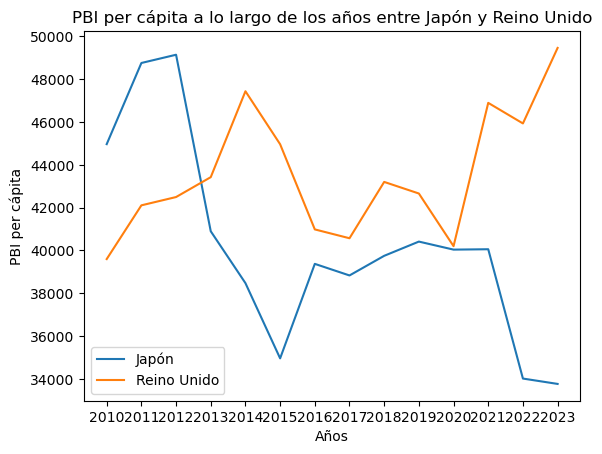

In [20]:
plt.plot(x1, y1, label="Japón") 
plt.plot(x2, y2, label="Reino Unido") 
plt.gca().invert_xaxis()
plt.xlabel("Años")
plt.ylabel("PBI per cápita")
plt.title("PBI per cápita a lo largo de los años entre Japón y Reino Unido")

plt.legend()
plt.show() 
#Esto es para armar el gráfico con el título, y lo que significan los número de los ejes con estilo pyplot

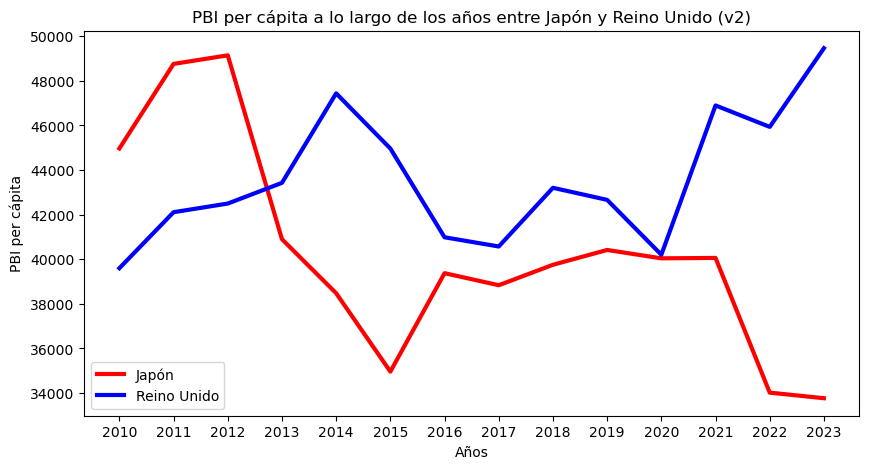

In [31]:
fig, ax = plt.subplots(figsize=(10,5)) 

linea_jpn,=ax.plot(x1, y1,"r", label="Japón") 
linea_gbr,=ax.plot(x2, y2,"b", label="Reino Unido") 
ax.invert_xaxis()
linea_jpn.set_linewidth(3)
linea_gbr.set_linewidth(3)
ax.set_xlabel("Años")
ax.set_ylabel("PBI per cápita")
ax.set_title("PBI per cápita a lo largo de los años entre Japón y Reino Unido (v2)")

ax.legend()
fig.show()
#La forma de hacer el gráfico orientado a objetos donde se puede personalizar más cambiando el color y el grosor de las lineas